In [86]:
import random
import numpy
import matplotlib.pyplot as plt
from tabulate import tabulate
import scipy.optimize as optimize

### Initializing

In [87]:
alpha = random.uniform(0, 1)    #random value
beta = random.uniform(0, 1)     #random value
size_of_array = 100
min_ab=0
max_ab=1
error =0.001
delta_normal=numpy.random.standard_normal(size=size_of_array)     #random samples samples from a standard Normal distribution (mean=0, stdev=1).   
x=[]   #Intializing the x vector
y=[]   #Intializing the y vector
y_clear =[] #Intializing the clear y vector
for k in range(size_of_array):    #According to the proposed formulas, calculating x and y with noise (y), ckear y without noise
    x.append(k/100)
    y.append(alpha* x[k]+ beta+ delta_normal[k])
    y_clear.append(alpha* x[k]+ beta)
x=numpy.array(x)        #transforming to numpy.array for future uses.
y=numpy.array(y)
y_clear=numpy.array(y_clear)

### Defining Gradient Descent

In [88]:
def gradient_descent(x, y, label, error,learningRatio):
    a, b = 0, 0
    num_iter = 0
    fun_cal = 0
    while True:
        num_iter += 1
        prev_a, prev_b = a, b
        if (label == "linear"):
            a = a - learningRatio * (-2) / len(x) * sum(x * (y - a * x - b))
            b = b - learningRatio * (-2) / len(x) * sum(y - a * x - b)
        elif (label == "rational"):
            a = a - learningRatio * (-2/len(x)) * sum((-a + b * x * y + y) / (b*x + 1)**2)
            b = b - learningRatio * (-2)/len(x) * sum(a * x * (a - y * (b*x + 1)) / (b * x + 1) ** 3)
        fun_cal += 1
        if (((a - prev_a) ** 2 + (b - prev_b) ** 2) ** 0.5 < error):
            break

    return a, b, num_iter, fun_cal

### Defining Mean Suquare Error for each approximation

In [89]:
# Mean Suare error with linear approximation
def MLS_linear(params, x,y):
    a, b = params
    return sum((y - (a*x+b))**2)

In [90]:
# Mean Suare error with rational approximation
def MLS_rational(params, x,y):
    a, b = params
    return sum((y - (a/ (1+b*x)))**2)

### Defining linear and rational approximation for the lm method

In [92]:
# linear approximation
def linear(params, x,y):
    a, b = params
    return (y - (a*x+b))

# rational approximation
def rational(params, x,y):
    a, b = params
    return (y - (a/ (1+b*x)))

### Applying the four methods

#### Linear Approximation

##### First and Second order methods

In [95]:
parameters_linear=[] # array to save the results

In [96]:
# optimization through the four methods
res_linear_grad_des = gradient_descent(x, y, 'linear', error, 1e-1)
res_linear_conj_grad = optimize.minimize(MLS_linear, [0, 0], args=(x,y), tol=error, method='CG')
res_linear_newton = optimize.minimize(MLS_linear, [0, 0], args=(x,y), tol=error, method='BFGS')
res_linear_lm = optimize.least_squares(linear, [0, 0], args=(x,y), xtol=error, method='lm')

In [97]:
#saving the results of the optimixation for each method in the defined array
parameters_linear.append([res_linear_grad_des[0],res_linear_grad_des[1],0,res_linear_grad_des[3],res_linear_grad_des[2]])
parameters_linear.append([res_linear_conj_grad.x[0],res_linear_conj_grad.x[1],res_linear_conj_grad.fun,res_linear_conj_grad.nfev,res_linear_conj_grad.nit])
parameters_linear.append([res_linear_newton.x[0],res_linear_newton.x[1],res_linear_newton.fun,res_linear_newton.nfev,res_linear_newton.nit])
parameters_linear.append([res_linear_lm.x[0],res_linear_lm.x[1],0,res_linear_lm.nfev,0])

##### zero order methods from task 02

In [98]:
# from previous task
res_linear_exhaustive = optimize.brute(MLS_linear, [[0, 1], [0, 1]], args=(x,y), Ns=int(1/error) + 1,full_output=True)
res_linear_gaus = optimize.minimize(MLS_linear, [0, 0], args=(x,y), tol=error, method='Powell')
res_linear_nm = optimize.minimize(MLS_linear, [0, 0], args=(x,y), tol=error, method='Nelder-Mead')
parameters_linear.append([res_linear_exhaustive[0][0],res_linear_exhaustive[0][1],res_linear_exhaustive[1],0,0])
parameters_linear.append([res_linear_gaus.x[0],res_linear_gaus.x[1],res_linear_gaus.fun,res_linear_gaus.nfev,res_linear_gaus.nit])
parameters_linear.append([res_linear_nm.x[0],res_linear_nm.x[1],res_linear_nm.fun,res_linear_nm.nfev,res_linear_nm.nit])

##### Printing the results

In [111]:
# Printing a table with results
rowIDs=[ 'Gradient Descent','Non-linear CGD','Newton’s ','Levenberg-Marquardt ','Exhaustive','Gauss ','Nelder-Mead']
print(tabulate(parameters_linear, headers=['a','b','function value','function claculation','num of iteration'],tablefmt='fancy_grid',numalign ='center',showindex=rowIDs))

╒═════════════════════╤══════════╤══════════╤══════════════════╤════════════════════════╤════════════════════╕
│                     │    a     │    b     │  function value  │  function claculation  │  num of iteration  │
╞═════════════════════╪══════════╪══════════╪══════════════════╪════════════════════════╪════════════════════╡
│ Gradient Descent    │ 0.349185 │ 0.284395 │        0         │           87           │         87         │
├─────────────────────┼──────────┼──────────┼──────────────────┼────────────────────────┼────────────────────┤
│ Non-linear CGD      │ 0.411787 │ 0.251574 │     67.0848      │           15           │         2          │
├─────────────────────┼──────────┼──────────┼──────────────────┼────────────────────────┼────────────────────┤
│ Newton’s            │ 0.411787 │ 0.251574 │     67.0848      │           15           │         2          │
├─────────────────────┼──────────┼──────────┼──────────────────┼────────────────────────┼────────────────────┤
│

##### Visualizing zero, first and second order methods.

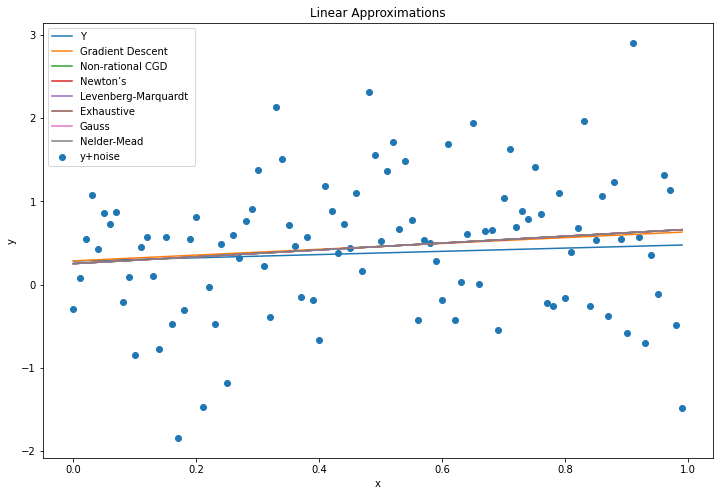

In [110]:
#ploting original y data (with no nise), y data with noise, and each of the 7 optimization methods
plt.figure(figsize=(12, 8))
plt.plot(x, y_clear)
plt.plot(x, numpy.array(res_linear_grad_des[0]*x+res_linear_grad_des[1]))
plt.plot(x, numpy.array(res_linear_conj_grad.x[0]*x+res_linear_conj_grad.x[1]))
plt.plot(x, numpy.array(res_linear_newton.x[0]*x+res_linear_newton.x[1]))
plt.plot(x, numpy.array(res_linear_newton.x[0]*x+res_linear_newton.x[1]))
plt.plot(x, numpy.array(res_linear_exhaustive[0][0]*x+res_linear_exhaustive[0][1]))
plt.plot(x, numpy.array(res_linear_gaus.x[0]*x+res_linear_gaus.x[1]))
plt.plot(x, numpy.array(res_linear_nm.x[0]*x+res_linear_nm.x[1]))
plt.scatter(x, y)
plt.legend(['Y','Gradient Descent','Non-rational CGD','Newton’s ','Levenberg-Marquardt ',"Exhaustive", "Gauss","Nelder-Mead",'y+noise'] ) 
plt.title("Linear Approximations")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

#### Rational approximation

##### First and Second order methods

In [101]:
parameters_rational=[] # array to save the results

In [103]:
# optimization through the four methods
res_rational_grad_des = gradient_descent(x, y, 'rational', error, 1e-1)
res_rational_conj_grad = optimize.minimize(MLS_rational, [0, 0], args=(x,y), tol=error, method='CG')
res_rational_newton = optimize.minimize(MLS_rational, [0, 0], args=(x,y), tol=error, method='BFGS')
res_rational_lm = optimize.least_squares(rational, [0, 0], args=(x,y), xtol=error, method='lm')

In [104]:
#saving the results of the optimixation for each method in the defined array
parameters_rational.append([res_rational_grad_des[0],res_rational_grad_des[1],0,res_rational_grad_des[3],res_rational_grad_des[2]])
parameters_rational.append([res_rational_conj_grad.x[0],res_rational_conj_grad.x[1],res_rational_conj_grad.fun,res_rational_conj_grad.nfev,res_rational_conj_grad.nit])
parameters_rational.append([res_rational_newton.x[0],res_rational_newton.x[1],res_rational_newton.fun,res_rational_newton.nfev,res_rational_newton.nit])
parameters_rational.append([res_rational_lm.x[0],res_rational_lm.x[1],0,res_rational_lm.nfev,0])

##### zero order methods from task 02

In [105]:
# from previous task
# optimization through the three methods
res_rational_exhaustive = optimize.brute(MLS_rational, [[0, 1], [0, 1]], args=(x,y), Ns=int(1/error) + 1,full_output=True)
res_rational_gaus = optimize.minimize(MLS_rational, [0, 0], args=(x,y), tol=error, method='Powell')
res_rational_nm = optimize.minimize(MLS_rational, [0, 0], args=(x,y), tol=error, method='Nelder-Mead')
parameters_rational.append([res_rational_exhaustive[0][0],res_rational_exhaustive[0][1],res_rational_exhaustive[1],0,0])
parameters_rational.append([res_rational_gaus.x[0],res_rational_gaus.x[1],res_rational_gaus.fun,res_rational_gaus.nfev,res_rational_gaus.nit])
parameters_rational.append([res_rational_nm.x[0],res_rational_nm.x[1],res_rational_nm.fun,res_rational_nm.nfev,res_rational_nm.nit])

##### Printing the results

In [112]:
# Printing a table with results
rowIDs=['Gradient Descent','Non-rational CGD','Newton’s ','Levenberg-Marquardt ','Exhaustive','Gauss ','Nelder-Mead'] # 'Gradient Descent'
print(tabulate(parameters_rational, headers=['a','b','function value','function claculation','num of iteration'],tablefmt='fancy_grid',numalign ='center',showindex=rowIDs))

╒═════════════════════╤══════════╤═══════════╤══════════════════╤════════════════════════╤════════════════════╕
│                     │    a     │     b     │  function value  │  function claculation  │  num of iteration  │
╞═════════════════════╪══════════╪═══════════╪══════════════════╪════════════════════════╪════════════════════╡
│ Gradient Descent    │ 0.380384 │ -0.333642 │        0         │          150           │        150         │
├─────────────────────┼──────────┼───────────┼──────────────────┼────────────────────────┼────────────────────┤
│ Non-rational CGD    │ 0.361041 │ -0.398479 │     67.6821      │          102           │         12         │
├─────────────────────┼──────────┼───────────┼──────────────────┼────────────────────────┼────────────────────┤
│ Newton’s            │ 0.361021 │ -0.398543 │     67.6821      │           51           │         8          │
├─────────────────────┼──────────┼───────────┼──────────────────┼────────────────────────┼──────────────

##### Visualizing zero, first and second order methods.

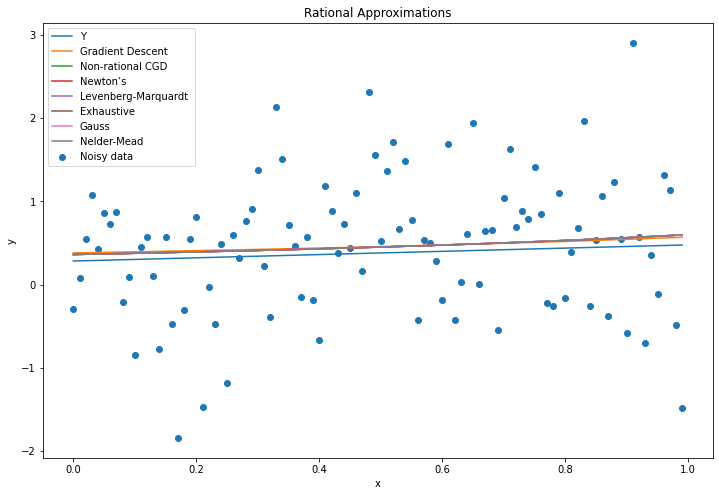

In [109]:
#ploting original y data (with no nise), y data with noise, and each of the 7 optimization methods
plt.figure(figsize=(12, 8))
plt.plot(x, y_clear)
plt.plot(x, numpy.array(res_rational_grad_des[0]/(1+ x* res_rational_grad_des[1])))
plt.plot(x, numpy.array(res_rational_conj_grad.x[0]/(1+x*res_rational_conj_grad.x[1])))
plt.plot(x, numpy.array(res_rational_newton.x[0]/(1+x*res_rational_newton.x[1])))
plt.plot(x, numpy.array(res_rational_lm.x[0]/(1+x*res_rational_lm.x[1])))
plt.plot(x, numpy.array(res_rational_exhaustive[0][0]/(1+x*res_rational_exhaustive[0][1])))
plt.plot(x, numpy.array(res_rational_gaus.x[0]/(1+x*res_rational_gaus.x[1])))
plt.plot(x, numpy.array(res_rational_nm.x[0]/(1+x*res_rational_nm.x[1])))
plt.scatter(x, y)
plt.legend(['Y','Gradient Descent','Non-rational CGD','Newton’s ','Levenberg-Marquardt ',"Exhaustive", "Gauss","Nelder-Mead","Noisy data",'y+noise'] ) 
plt.xlabel("x")
plt.ylabel("y")
plt.title("Rational Approximations")
plt.show()